# Assignment 2: Prediction of Cellular Composition

The objective is to develop a regression model to predict the number of six different types of cells in a given histological image patch.

In [6]:
import numpy as np
import pandas as pd

X: np.ndarray = np.load("images.npy") # reads images
Y: pd.core.frame.DataFrame = pd.read_csv("counts.csv") # reads cell counts
F: np.ndarray = np.loadtxt("split.txt") # reads fold information

In [7]:
print(f"Shape of image file is {X.shape}, so there are {X.shape[0]} images each with dimension {X.shape[1:]}.")
print(f"\nCounts Table:\n{Y}\n")
print(f"Number of rows in split text file: {F.shape[0]}. Should be the same as number of images: {X.shape[0] == F.shape[0]}.")
print(f"The unique values in the split text file are: {np.unique(F)}, so there are only {np.unique(F).size} folds.")

Shape of image file is (4981, 256, 256, 3), so there are 4981 images each with dimension (256, 256, 3).

Counts Table:
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
0              0         117           0       0           0           0
1              0          95           1       0           0           8
2              0         172           3       0           0           2
3              0          56           0       0           0          10
4              0         169           7       0           0           0
...          ...         ...         ...     ...         ...         ...
4976           0          22          17       8           2          50
4977           0          78           9       0           0           9
4978           0         106           1       0           0           0
4979           0          80           8       1           0          14
4980           0          99           3       0           0           1

[498

## Task 1: Data Analysis

### i) How many examples are there in each fold

First we creat the folds.

In [8]:
fold_1: np.ndarray = np.array([x for i, x in enumerate(X) if F[i] == 1])
fold_2: np.ndarray = np.array([x for i, x in enumerate(X) if F[i] == 2])
fold_3: np.ndarray = np.array([x for i, x in enumerate(X) if F[i] == 3])

Then we count the number of examples in each fold.

In [9]:
print(f"Number of examples in fold 1: {fold_1.shape[0]}.")
print(f"Number of examples in fold 2: {fold_2.shape[0]}.")
print(f"Number of examples in fold 3: {fold_3.shape[0]}.")

Number of examples in fold 1: 1622.
Number of examples in fold 2: 1751.
Number of examples in fold 3: 1608.


### ii) Showing some examples

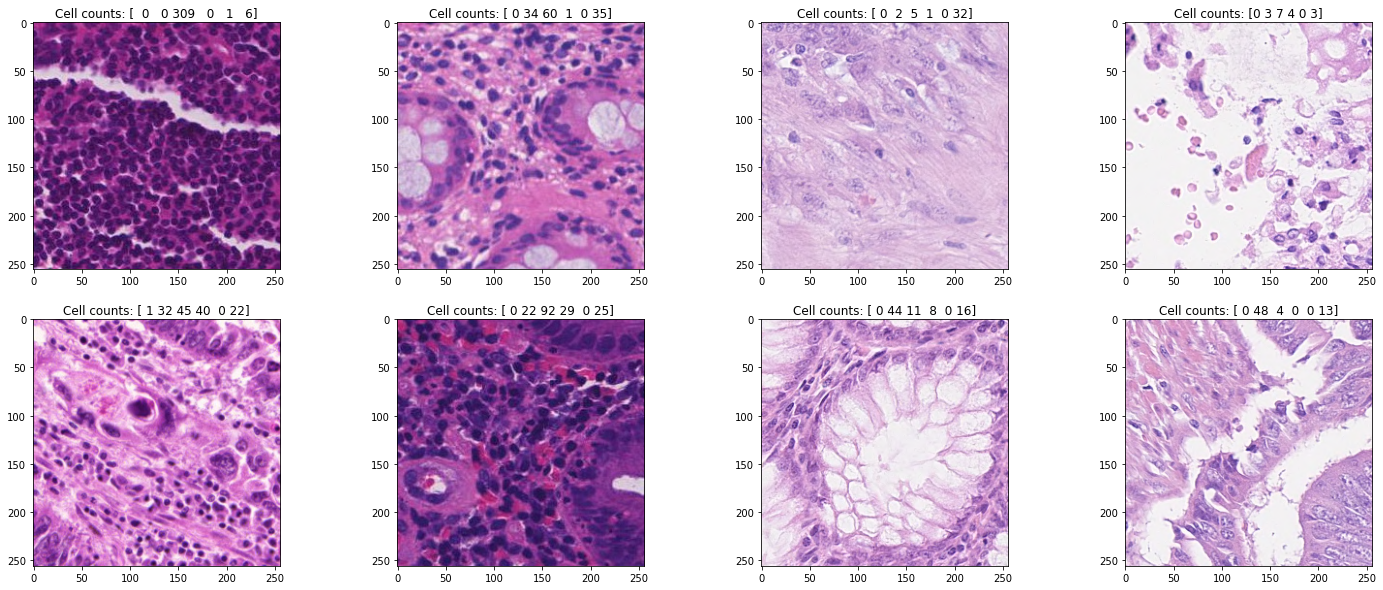

In [10]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
rnd_indeces: list = random.choices(range(X.shape[0]), k=8)
rnd_imgs: list = [X[i] for i in rnd_indeces]

ax[0,0].imshow(rnd_imgs[0])
ax[0,0].set_title(f"Cell counts: {Y.loc[rnd_indeces[0]].to_numpy()}")

ax[0,1].imshow(rnd_imgs[1])
ax[0,1].set_title(f"Cell counts: {Y.loc[rnd_indeces[1]].to_numpy()}")

ax[0,2].imshow(rnd_imgs[2])
ax[0,2].set_title(f"Cell counts: {Y.loc[rnd_indeces[2]].to_numpy()}")

ax[0,3].imshow(rnd_imgs[3])
ax[0,3].set_title(f"Cell counts: {Y.loc[rnd_indeces[3]].to_numpy()}")

ax[1,0].imshow(rnd_imgs[4])
ax[1,0].set_title(f"Cell counts: {Y.loc[rnd_indeces[4]].to_numpy()}")

ax[1,1].imshow(rnd_imgs[5])
ax[1,1].set_title(f"Cell counts: {Y.loc[rnd_indeces[5]].to_numpy()}")

ax[1,2].imshow(rnd_imgs[6])
ax[1,2].set_title(f"Cell counts: {Y.loc[rnd_indeces[6]].to_numpy()}")

ax[1,3].imshow(rnd_imgs[7])
ax[1,3].set_title(f"Cell counts: {Y.loc[rnd_indeces[7]].to_numpy()}")

plt.show()

It is possible from looking at the images and at the cell counts that the T3 cells are the small dark purple cells.

### iii) Plot the histogram of counts of each cell type (for each fold)

1. First we need to get the counts for images seperated by fold

In [11]:
Y_array: np.ndarray = Y.to_numpy()

fold_1_counts: np.ndarray = np.array([x for i, x in enumerate(Y_array) if F[i] == 1])
fold_2_counts: np.ndarray = np.array([x for i, x in enumerate(Y_array) if F[i] == 2])
fold_3_counts: np.ndarray = np.array([x for i, x in enumerate(Y_array) if F[i] == 3]) 

2. Then we plot the histograms for our 6 cell types for each fold.

Number of images with cell counts in the following bins for each cell type:

Cell Type    0  1-5  6-10  11-20  21-30  31-40  41-50  >50
       T1 3912  867   121     64     10      3      4    0
       T2  792  154   145    336    435    546    569 2004
       T3  625 1365   652    888    556    312    184  399
       T4 1878 1639   656    549    167     51     25   16
       T5 3731 1142    91     16      1      0      0    0
       T6  454  636   686   1211    873    534    284  303



Histogram of counts for each cell type, for each fold:



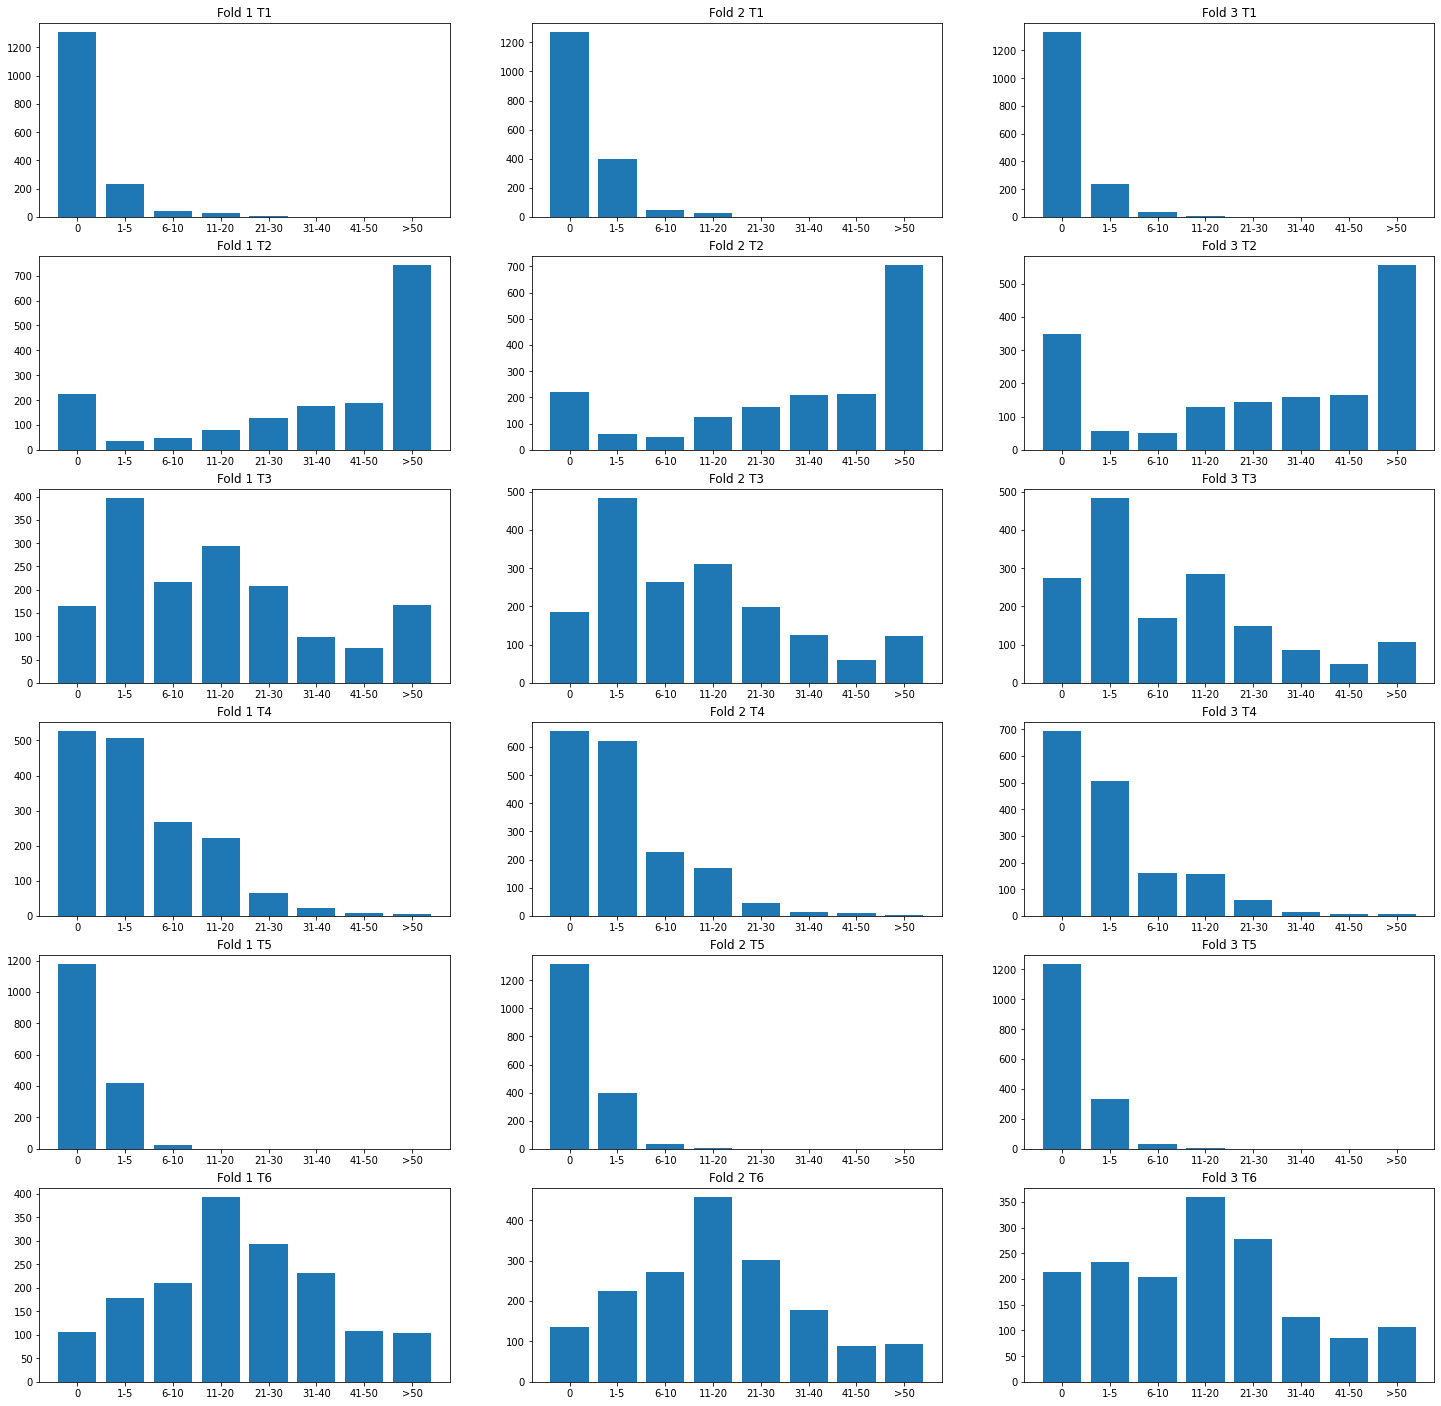

In [12]:
def plot_hist(a: np.ndarray, axis: tuple, title: str) -> np.ndarray:

    total: int = a.size
    more_than_zero: int = a[a > 0].size
    more_than_five: int = a[a > 5].size
    more_than_ten: int = a[a > 10].size
    more_than_twenty: int = a[a > 20].size
    more_than_thirty: int = a[a > 30].size
    more_than_fourty: int = a[a > 40].size
    more_than_fifty: int = a[a > 50].size

    bin_0: int = total - more_than_zero
    bin_1: int = more_than_zero - more_than_five
    bin_2: int = more_than_five - more_than_ten
    bin_3: int = more_than_ten - more_than_twenty
    bin_4: int = more_than_twenty - more_than_thirty
    bin_5: int = more_than_thirty - more_than_fourty
    bin_6: int = more_than_fourty - more_than_fifty
    bin_7: int = more_than_fifty

    ax[axis[0], axis[1]].bar(["0","1-5","6-10","11-20","21-30", "31-40", "41-50", ">50"], [bin_0, bin_1, bin_2, bin_3, bin_4, bin_5, bin_6, bin_7])
    ax[axis[0], axis[1]].set_title(title)

    return np.array([bin_0, bin_1, bin_2, bin_3, bin_4, bin_5, bin_6, bin_7], dtype=int)

fig, ax = plt.subplots(nrows=6, ncols=3, figsize =(25, 25))

counts: np.ndarray = np.zeros((6, 8), dtype=int)

for i in range(6):
    a: np.ndarray = fold_1_counts[:,i]
    b: np.ndarray = plot_hist(a, (i,0), f"Fold 1 T{i+1}")

    counts[i] += b

for i in range(6):
    a: np.ndarray = fold_2_counts[:,i]
    b: np.ndarray = plot_hist(a, (i,1), f"Fold 2 T{i+1}")

    counts[i] += b

for i in range(6):
    a: np.ndarray = fold_3_counts[:,i]
    b: np.ndarray = plot_hist(a, (i,2), f"Fold 3 T{i+1}")

    counts[i] += b

counts_df = pd.DataFrame(counts, columns=["0", "1-5", "6-10", "11-20", "21-30", "31-40", "41-50", ">50"])
counts_df.insert(0, "Cell Type", ["T1", "T2", "T3", "T4", "T5", "T6"], True)


print("Number of images with cell counts in the following bins for each cell type:\n")
print(counts_df.to_string(index=False))

print("\n\n\nHistogram of counts for each cell type, for each fold:\n")
plt.show()

These histograms show that the distribution of of cell types is very similar across all three folds which is good as it means we can reliably use them as training, validation and testing folds. In particular folds 1 and 2 have a nearly identical distribution while fold 3 is more different. Comparing the histograms to the above table we also see that each fold has a similar distribution to the entire dataset.

In [13]:
for i in range(6):
    print(f"# of T{i+1} cells: {Y_array[:,i].sum()}")

# of T1 cells: 4012
# of T2 cells: 222017
# of T3 cells: 93612
# of T4 cells: 24793
# of T5 cells: 2999
# of T6 cells: 98783


However we can also see that not all cells appear equally often, with T1 and T5 cells occuring very rarely while T3 and T6 cells dominate.

### iv) Converting images from RGB to HED

We will use the same images random pictures as those chosen in part (ii) for easy comparison.

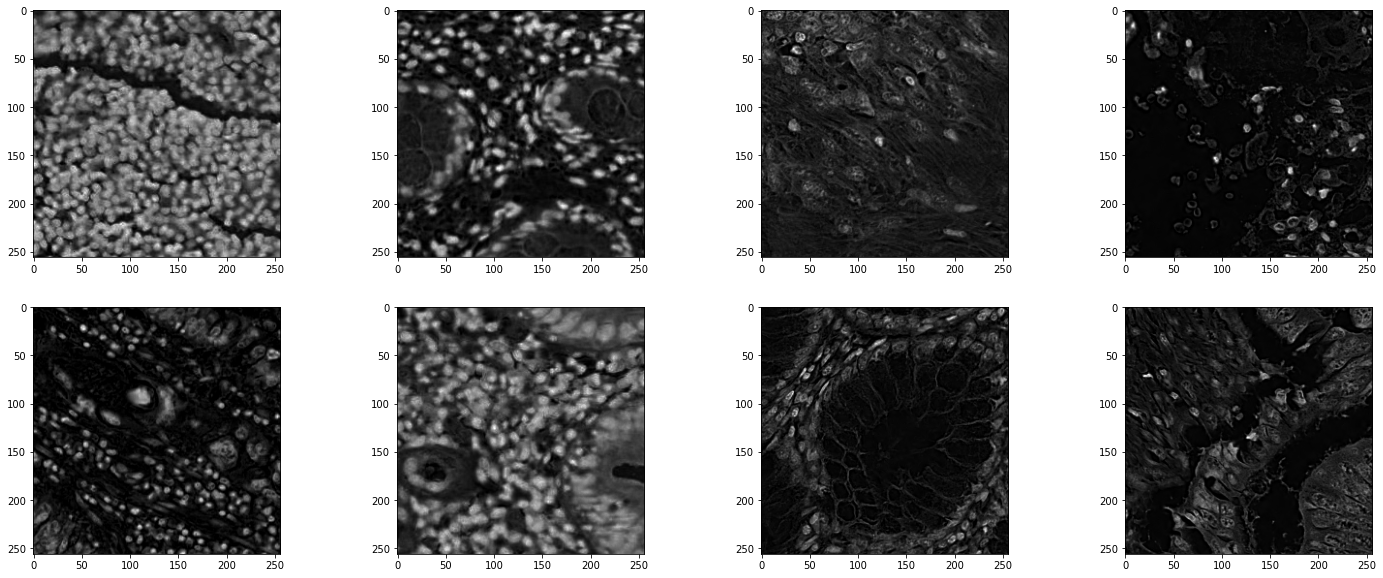

In [14]:
from skimage.color import rgb2hed

def convertToHChannel(img: np.ndarray) -> np.ndarray:
    I: np.ndarray = img/255.0
    I_hed: np.ndarray = rgb2hed(I)
    return I_hed[...,0]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

ax[0,0].imshow(convertToHChannel(rnd_imgs[0]), cmap="gray")
ax[0,1].imshow(convertToHChannel(rnd_imgs[1]), cmap="gray")
ax[0,2].imshow(convertToHChannel(rnd_imgs[2]), cmap="gray")
ax[0,3].imshow(convertToHChannel(rnd_imgs[3]), cmap="gray")
ax[1,0].imshow(convertToHChannel(rnd_imgs[4]), cmap="gray")
ax[1,1].imshow(convertToHChannel(rnd_imgs[5]), cmap="gray")
ax[1,2].imshow(convertToHChannel(rnd_imgs[6]), cmap="gray")
ax[1,3].imshow(convertToHChannel(rnd_imgs[7]), cmap="gray")

plt.show()

### v) Scatter plot of average H-channel for each image vs cell count (one type) for fold-1

In [15]:
fold_1_h: np.ndarray = np.array([convertToHChannel(i) for i in fold_1])
fold_1_h_mean: np.ndarray = np.array([np.mean(img) for img in fold_1_h])

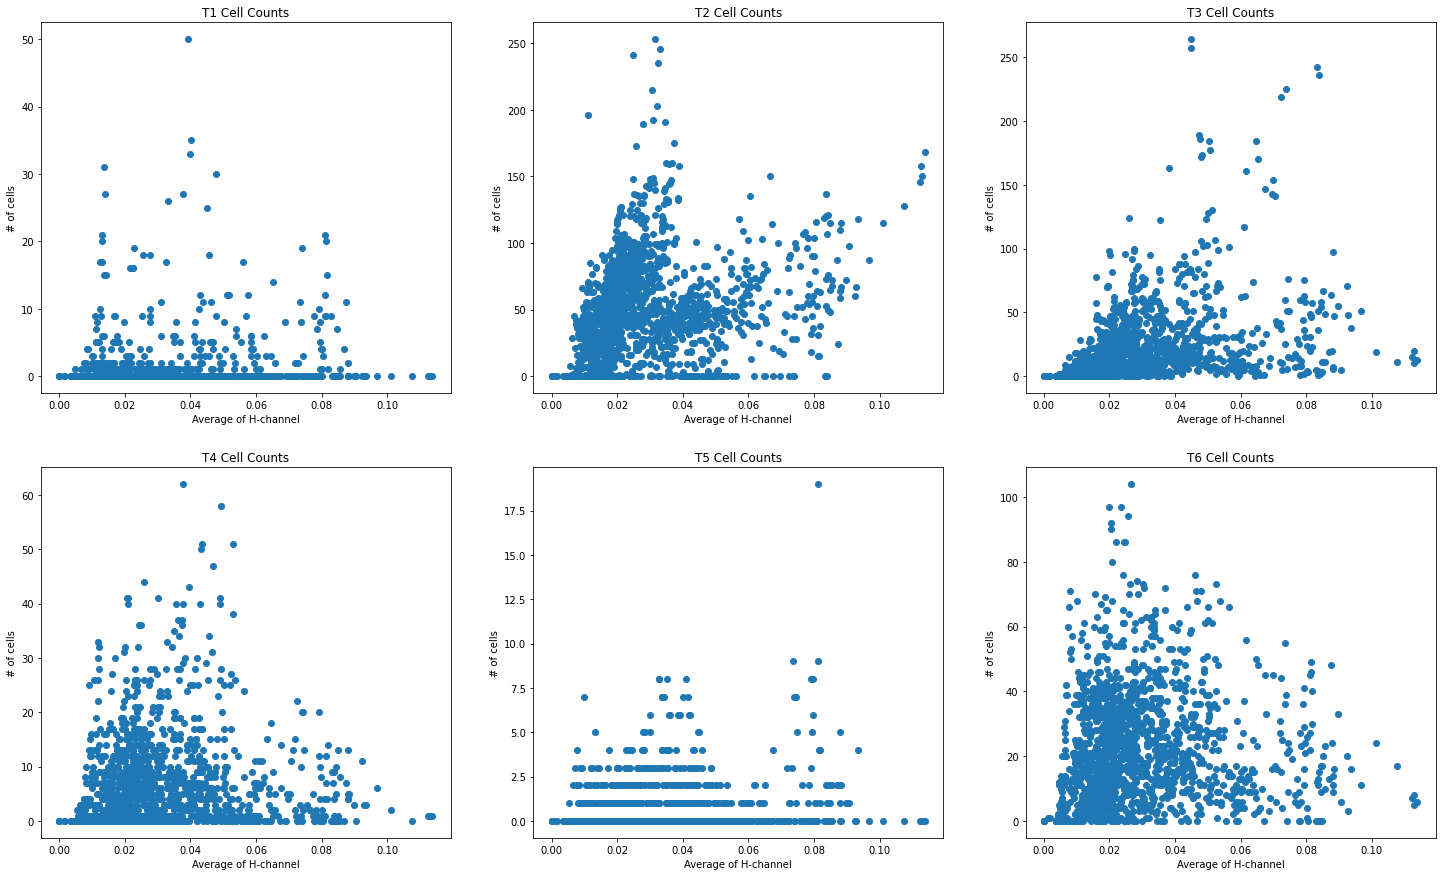

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))

ax[0,0].scatter(fold_1_h_mean, fold_1_counts[:,0])
ax[0,0].set_title("T1 Cell Counts")
ax[0,0].set_xlabel("Average of H-channel")
ax[0,0].set_ylabel("# of cells")

ax[0,1].scatter(fold_1_h_mean, fold_1_counts[:,1])
ax[0,1].set_title("T2 Cell Counts")
ax[0,1].set_xlabel("Average of H-channel")
ax[0,1].set_ylabel("# of cells")

ax[0,2].scatter(fold_1_h_mean, fold_1_counts[:,2])
ax[0,2].set_title("T3 Cell Counts")
ax[0,2].set_xlabel("Average of H-channel")
ax[0,2].set_ylabel("# of cells")

ax[1,0].scatter(fold_1_h_mean, fold_1_counts[:,3])
ax[1,0].set_title("T4 Cell Counts")
ax[1,0].set_xlabel("Average of H-channel")
ax[1,0].set_ylabel("# of cells")

ax[1,1].scatter(fold_1_h_mean, fold_1_counts[:,4])
ax[1,1].set_title("T5 Cell Counts")
ax[1,1].set_xlabel("Average of H-channel")
ax[1,1].set_ylabel("# of cells")

ax[1,2].scatter(fold_1_h_mean, fold_1_counts[:,5])
ax[1,2].set_title("T6 Cell Counts")
ax[1,2].set_xlabel("Average of H-channel")
ax[1,2].set_ylabel("# of cells")

plt.show()

This feature may be useful for T2, T3, T4, and T6 cell counts as there seems to be some proportional relationship between the average H-channel of the image and the cell count. However for T1 and T5 there does not seem to be any correlation so the average H-channel is probably not a useful feature for predicting T1 or T5 cell counts.

### vi) Which performance metric to use?

1. RMSE (Root Mean Squared Error)
2. Pearson Correlation Coefficient
3. Spearman Correlation Coefficient
4. R2 score
5. MAE (Mean absolute error)

The best metric for us to use for this problem will be RMSE as it has the same units which makes it easily interpretable and it puts a high weight on large outliers which we would especially like to avoid. It would make no sense for our model to massively miscount the number of a type of cells on one picture. We would prefer many small miscounts.

## Task 2: Feature Extraction and Classical Regression

For this task we are only going to use T3 type cells as the output prediction variable.

### i) Extracting features from a given image.

1. average of 'H', red, green, blue channels
2. variance of 'H', red, green, blue channels
3. entropy of 'H', red, green, blue channels
4. other features...

First we have to create the seperate channels for 'H', R, G and B.

In [17]:
h_channel: np.ndarray = np.zeros(X.shape[:-1])
R_channel: np.ndarray = np.zeros(X.shape[:-1])
G_channel: np.ndarray = np.zeros(X.shape[:-1])
B_channel: np.ndarray = np.zeros(X.shape[:-1])

for i, img in enumerate(X):
    h_channel[i] = convertToHChannel(img)
    # we divide by 255 to normalize the RBG values between 0 and 1 (this was already done for the h_channel in the function convertToHChannel)
    R_channel[i] = img[:,:,0]/255
    G_channel[i] = img[:,:,1]/255
    B_channel[i] = img[:,:,2]/255

Next we define a function to apply a function to a numpy array. We will use this function to get the mean, variance and entropy of our channels.

In [18]:
def applyFunction(func, channel: np.ndarray) -> np.ndarray:
    channel_func = np.zeros(channel.shape[0])
    for i, img in enumerate(channel):
        channel_func[i] = func(img)
    return channel_func

1. Now we get the averages for our four channels.

In [19]:
h_channel_avgs: np.ndarray = applyFunction(np.mean, h_channel)
R_channel_avgs: np.ndarray = applyFunction(np.mean, R_channel)
G_channel_avgs: np.ndarray = applyFunction(np.mean, G_channel)
B_channel_avgs: np.ndarray = applyFunction(np.mean, B_channel)

2. Now the variance for our four channels.

In [20]:
h_channel_variances: np.ndarray = applyFunction(np.var, h_channel)
R_channel_variances: np.ndarray = applyFunction(np.var, R_channel)
G_channel_variances: np.ndarray = applyFunction(np.var, G_channel)
B_channel_variances: np.ndarray = applyFunction(np.var, B_channel)

3. Now the entropy for our four channels.

In [21]:
# define entropy function
from scipy.stats import entropy

def getEntropy(a: np.ndarray) -> np.ndarray:
    return entropy(a.flatten(), base=2)

In [22]:
h_channel_entropies: np.ndarray = applyFunction(getEntropy, h_channel)
R_channel_entropies: np.ndarray = applyFunction(getEntropy, R_channel)
G_channel_entropies: np.ndarray = applyFunction(getEntropy, G_channel)
B_channel_entropies: np.ndarray = applyFunction(getEntropy, B_channel)

Scatter plots of features against T3 cell count.

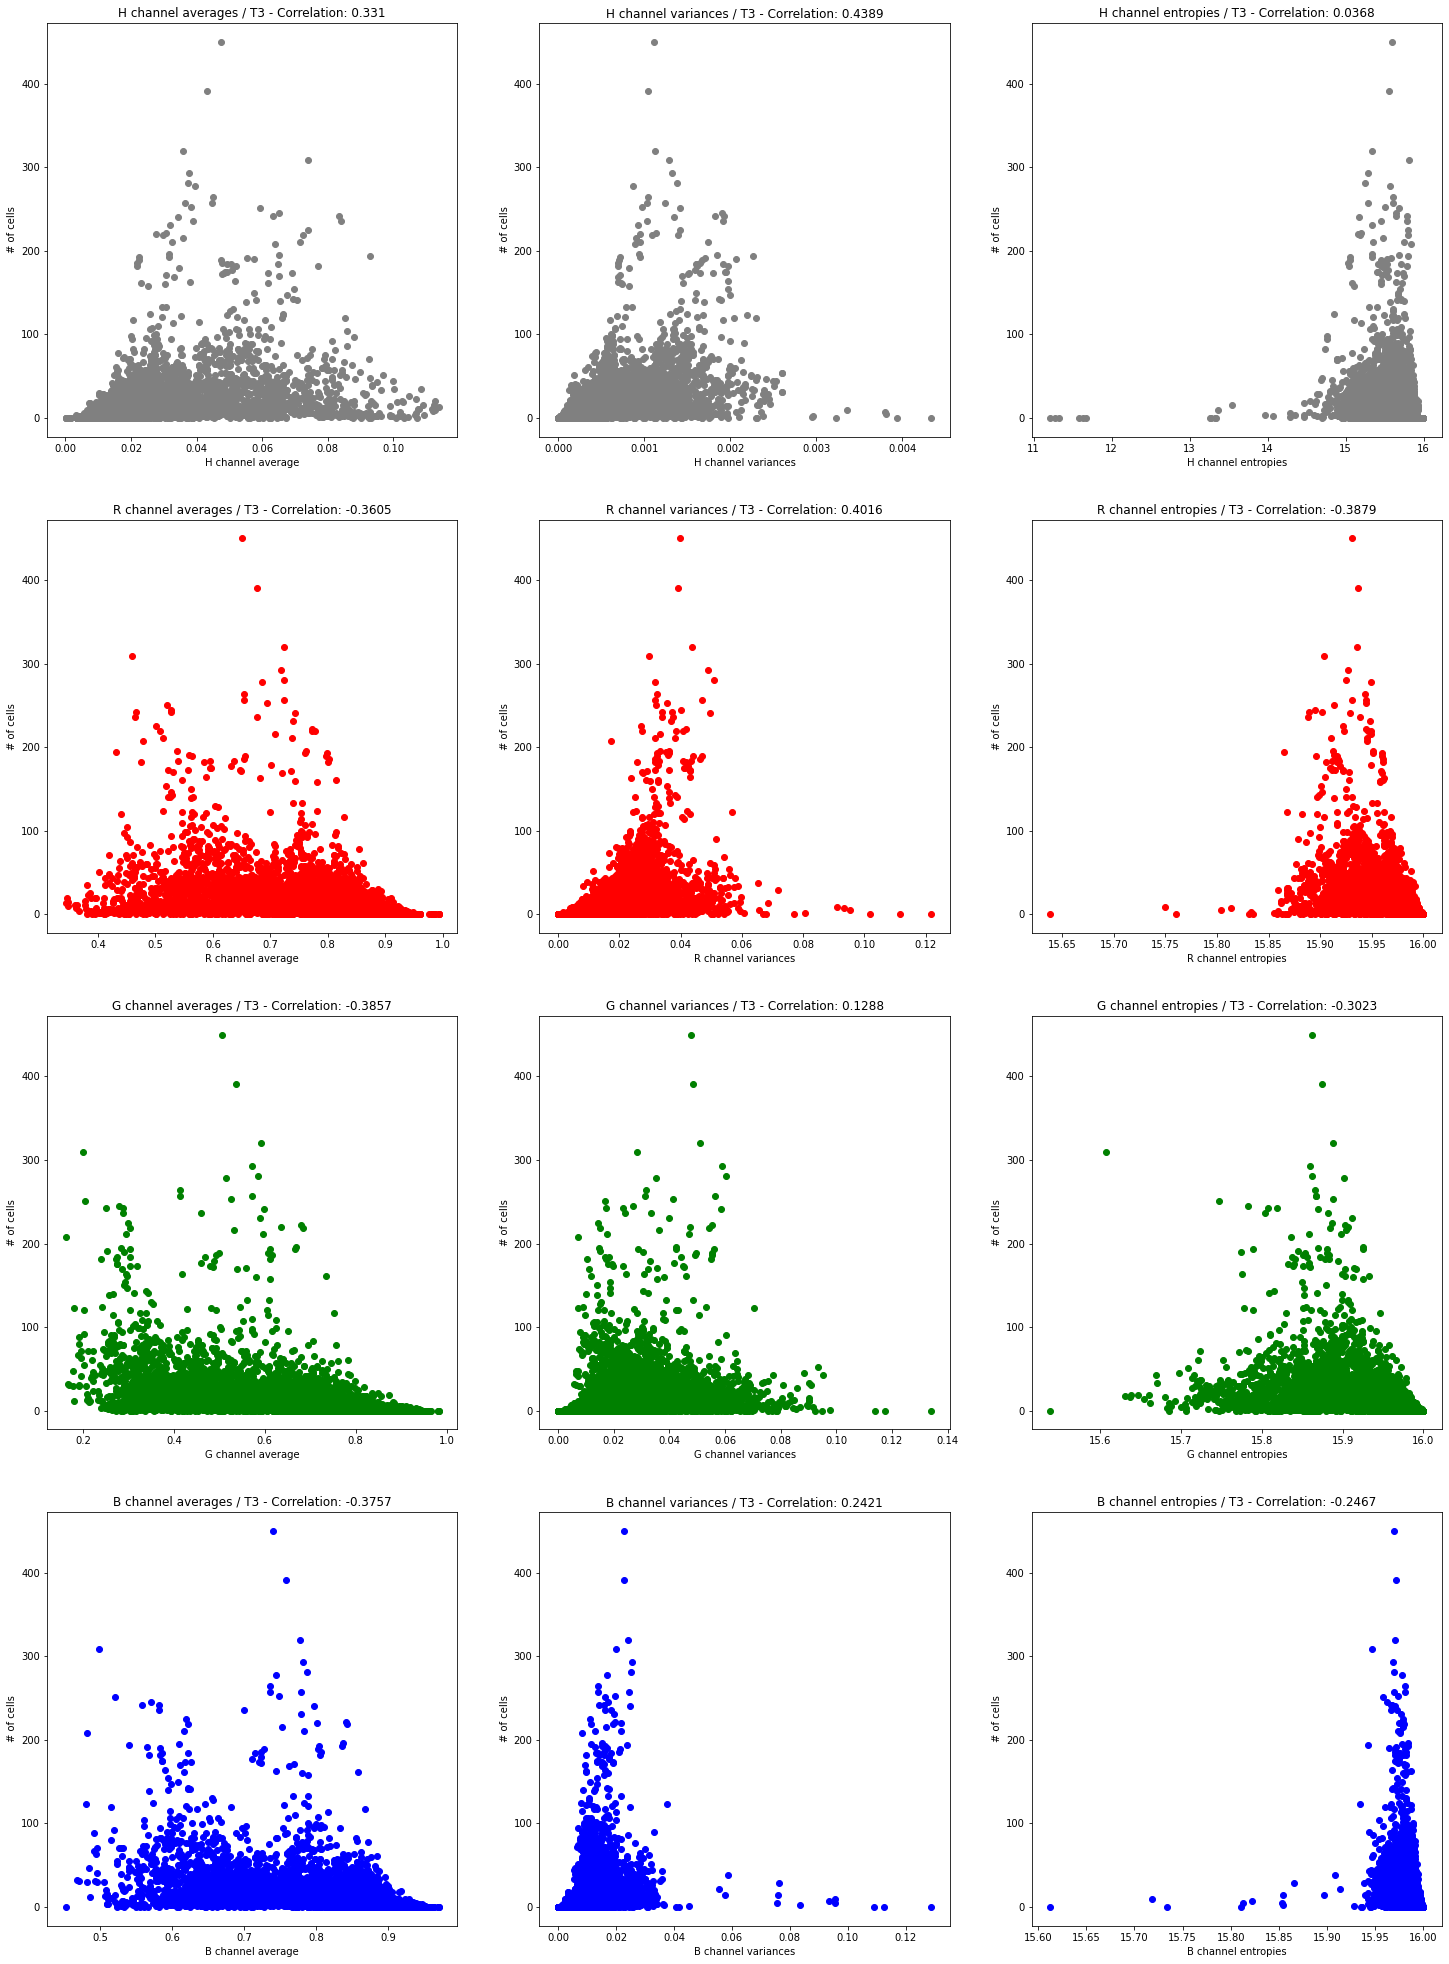

In [23]:
from scipy.stats import pearsonr

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25, 35))
T3_cell_counts = Y_array[:,2]

ax[0,0].scatter(h_channel_avgs, T3_cell_counts, color="gray")
ax[0,0].set_title(f"H channel averages / T3 - Correlation: {round(pearsonr(h_channel_avgs, T3_cell_counts)[0], 4)}")
ax[0,0].set_xlabel("H channel average")
ax[0,0].set_ylabel("# of cells")

ax[1,0].scatter(R_channel_avgs, T3_cell_counts, color="red")
ax[1,0].set_title(f"R channel averages / T3 - Correlation: {round(pearsonr(R_channel_avgs, T3_cell_counts)[0], 4)}")
ax[1,0].set_xlabel("R channel average")
ax[1,0].set_ylabel("# of cells")

ax[2,0].scatter(G_channel_avgs, T3_cell_counts, color="green")
ax[2,0].set_title(f"G channel averages / T3 - Correlation: {round(pearsonr(G_channel_avgs, T3_cell_counts)[0], 4)}")
ax[2,0].set_xlabel("G channel average")
ax[2,0].set_ylabel("# of cells")

ax[3,0].scatter(B_channel_avgs, T3_cell_counts, color="blue")
ax[3,0].set_title(f"B channel averages / T3 - Correlation: {round(pearsonr(B_channel_avgs, T3_cell_counts)[0], 4)}")
ax[3,0].set_xlabel("B channel average")
ax[3,0].set_ylabel("# of cells")

ax[0,1].scatter(h_channel_variances, T3_cell_counts, color="gray")
ax[0,1].set_title(f"H channel variances / T3 - Correlation: {round(pearsonr(h_channel_variances, T3_cell_counts)[0], 4)}")
ax[0,1].set_xlabel("H channel variances")
ax[0,1].set_ylabel("# of cells")

ax[1,1].scatter(R_channel_variances, T3_cell_counts, color="red")
ax[1,1].set_title(f"R channel variances / T3 - Correlation: {round(pearsonr(R_channel_variances, T3_cell_counts)[0], 4)}")
ax[1,1].set_xlabel("R channel variances")
ax[1,1].set_ylabel("# of cells")

ax[2,1].scatter(G_channel_variances, T3_cell_counts, color="green")
ax[2,1].set_title(f"G channel variances / T3 - Correlation: {round(pearsonr(G_channel_variances, T3_cell_counts)[0], 4)}")
ax[2,1].set_xlabel("G channel variances")
ax[2,1].set_ylabel("# of cells")

ax[3,1].scatter(B_channel_variances, T3_cell_counts, color="blue")
ax[3,1].set_title(f"B channel variances / T3 - Correlation: {round(pearsonr(B_channel_variances, T3_cell_counts)[0], 4)}")
ax[3,1].set_xlabel("B channel variances")
ax[3,1].set_ylabel("# of cells")

ax[0,2].scatter(h_channel_entropies, T3_cell_counts, color="gray")
ax[0,2].set_title(f"H channel entropies / T3 - Correlation: {round(pearsonr(h_channel_entropies, T3_cell_counts)[0], 4)}")
ax[0,2].set_xlabel("H channel entropies")
ax[0,2].set_ylabel("# of cells")

ax[1,2].scatter(R_channel_entropies, T3_cell_counts, color="red")
ax[1,2].set_title(f"R channel entropies / T3 - Correlation: {round(pearsonr(R_channel_entropies, T3_cell_counts)[0], 4)}")
ax[1,2].set_xlabel("R channel entropies")
ax[1,2].set_ylabel("# of cells")

ax[2,2].scatter(G_channel_entropies, T3_cell_counts, color="green")
ax[2,2].set_title(f"G channel entropies / T3 - Correlation: {round(pearsonr(G_channel_entropies, T3_cell_counts)[0], 4)}")
ax[2,2].set_xlabel("G channel entropies")
ax[2,2].set_ylabel("# of cells")

ax[3,2].scatter(B_channel_entropies, T3_cell_counts, color="blue")
ax[3,2].set_title(f"B channel entropies / T3 - Correlation: {round(pearsonr(B_channel_entropies, T3_cell_counts)[0], 4)}")
ax[3,2].set_xlabel("B channel entropies")
ax[3,2].set_ylabel("# of cells")


plt.show()

It seems that the R-channel features (average, variance and entropy) are useful perhaps because the T3 cells are purple and therefore more red. Additionally the H-channel variance also has a high correlation and will be useful.

### ii) Try regression models using the features extracted in part i)

1. Ordinary Least Squares Regression (OLS)
2. Support Vector Regression (SVR)
3. Multilayer Perceptron (MLP)

First we have to combine all our features into one dataset (for each fold) to input into our model.
We will use fold 1 for training, fold 2 for validation and fold 3 for testing.

In [24]:
number_of_features = 12

# an extra constant term is added at the end as a feature for OLS
fold_1_features: np.ndarray = np.ones((fold_1.shape[0], number_of_features))
fold_2_features: np.ndarray = np.ones((fold_2.shape[0], number_of_features))
fold_3_features: np.ndarray = np.ones((fold_3.shape[0], number_of_features))

fold_1_index: int = 0
fold_2_index: int = 0
fold_3_index: int = 0

for i, x in enumerate(X):
    features_array: np.ndarray = np.array([h_channel_avgs[i], h_channel_variances[i], h_channel_entropies[i], R_channel_avgs[i], R_channel_variances[i],
        R_channel_entropies[i], G_channel_avgs[i], G_channel_variances[i], G_channel_entropies[i], B_channel_avgs[i], B_channel_variances[i],
        B_channel_entropies[i]])

    if F[i] == 1:
        fold_1_features[fold_1_index] = features_array
        fold_1_index += 1
    elif F[i] == 2:
        fold_2_features[fold_2_index] = features_array
        fold_2_index += 1
    else:
        fold_3_features[fold_3_index] = features_array
        fold_3_index += 1


1. We use Ordinary Least Squares Regression (OLS)

As there are no hyperparameters to tune for OLS we will use the first and second fold for training and use the third for testing.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr


# Get regrssion line using fold 1 and 2
regr_ols: LinearRegression = LinearRegression(fit_intercept = True).fit(np.concatenate((fold_1_features, fold_2_features), axis=0), np.concatenate((fold_1_counts[:,2], fold_2_counts[:,2]), axis=0))
print(f"There are {regr_ols.coef_.size} weights as there are {number_of_features} features from the constant term.")

# get predictions for fold 1 and 2
y_pred_OLS_train: np.ndarray = regr_ols.predict(np.concatenate((fold_1_features, fold_2_features), axis=0))

print("\nOn training set (fold 1 and 2):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(np.concatenate((fold_1_counts[:,2], fold_2_counts[:,2]), axis=0), y_pred_OLS_train, squared=False)}")
print(f"Pearson r score: {pearsonr(np.concatenate((fold_1_counts[:,2], fold_2_counts[:,2]), axis=0), y_pred_OLS_train)[0]}")
print(f"Spearman r score: {spearmanr(np.concatenate((fold_1_counts[:,2], fold_2_counts[:,2]), axis=0), y_pred_OLS_train)[0]}")
print(f"R2 score: {r2_score(np.concatenate((fold_1_counts[:,2], fold_2_counts[:,2]), axis=0), y_pred_OLS_train)}")

# get predictions for the third fold
y_pred_OLS: np.ndarray = regr_ols.predict(fold_3_features)

print("\nOn test set (fold 3):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_3_counts[:,2], y_pred_OLS, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_3_counts[:,2], y_pred_OLS)[0]}")
print(f"Spearman r score: {spearmanr(fold_3_counts[:,2], y_pred_OLS)[0]}")
print(f"R2 score: {r2_score(fold_3_counts[:,2], y_pred_OLS)}")


There are 12 weights as there are 12 features from the constant term.

On training set (fold 1 and 2):

RMSE: 25.313297061505825
Pearson r score: 0.5776616548831723
Spearman r score: 0.727976841946296
R2 score: 0.3336929875223654

On test set (fold 3):

RMSE: 29.524530302973133
Pearson r score: 0.4461305605381764
Spearman r score: 0.6293037239025208
R2 score: 0.0016214984050134662


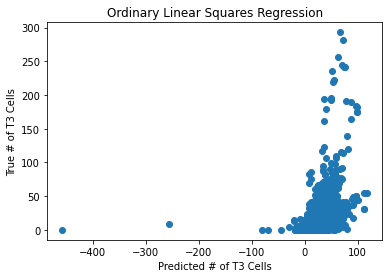

In [26]:
plt.scatter(y_pred_OLS, fold_3_counts[:,2])
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")
plt.title("Ordinary Linear Squares Regression")

plt.show()

This is a very high error.

2. Support Vector Regression

Here we will use fold 2 as a validation set to tune the hyper parameters.

In [27]:
from sklearn.svm import SVR

# Get regression line using fold 1 and 2
regr_svr: SVR = SVR(kernel='rbf', degree=3, C=0.35).fit(fold_1_features, fold_1_counts[:,2])

# get predictions for fold 1
y_pred_SVR_train: np.ndarray = regr_svr.predict(fold_1_features)

print("\nOn training set (fold 1):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_1_counts[:,2], y_pred_SVR_train, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_1_counts[:,2], y_pred_SVR_train)[0]}")
print(f"Spearman r score: {spearmanr(fold_1_counts[:,2], y_pred_SVR_train)[0]}")
print(f"R2 score: {r2_score(fold_1_counts[:,2], y_pred_SVR_train)}")


# get predictions for fold 2
y_pred_SVR_val: np.ndarray = regr_svr.predict(fold_2_features)

print("\nOn validation set (fold 2):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_2_counts[:,2], y_pred_SVR_val, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_2_counts[:,2], y_pred_SVR_val)[0]}")
print(f"Spearman r score: {spearmanr(fold_2_counts[:,2], y_pred_SVR_val)[0]}")
print(f"R2 score: {r2_score(fold_2_counts[:,2], y_pred_SVR_val)}")


# get predictions for the third fold
y_pred_SVR: np.ndarray = regr_svr.predict(fold_3_features)

print("\nOn test set (fold 3):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_3_counts[:,2], y_pred_SVR, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_3_counts[:,2], y_pred_SVR)[0]}")
print(f"Spearman r score: {spearmanr(fold_3_counts[:,2], y_pred_SVR)[0]}")
print(f"R2 score: {r2_score(fold_3_counts[:,2], y_pred_SVR)}")



On training set (fold 1):

RMSE: 30.28805234021092
Pearson r score: 0.44604366348332847
Spearman r score: 0.6383118974452366
R2 score: -0.10999788824736512

On validation set (fold 2):

RMSE: 33.85662158414728
Pearson r score: 0.3641081169117752
Spearman r score: 0.5842750896106372
R2 score: -0.056027236893945176

On test set (fold 3):

RMSE: 30.032351557086383
Pearson r score: 0.38038352835273637
Spearman r score: 0.6286430382143793
R2 score: -0.03301803645364476


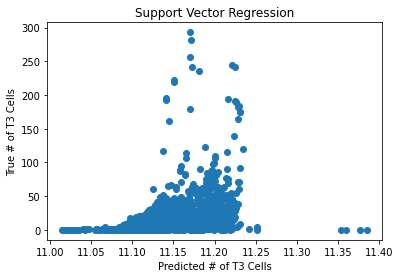

In [28]:
plt.scatter(y_pred_SVR, fold_3_counts[:,2])
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")
plt.title("Support Vector Regression")

plt.show()

3. MLP

Same as for SVR will use fold 2 as a validation set.

In [29]:
from sklearn.neural_network import MLPRegressor

# Get regression line using fold 1 and 2
regr_mlp: MLPRegressor = MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20), max_iter=500).fit(fold_1_features, fold_1_counts[:,2])

# get predictions for fold 1
y_pred_mlp_train: np.ndarray = regr_mlp.predict(fold_1_features)

print("\nOn training set (fold 1):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_1_counts[:,2], y_pred_mlp_train, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_1_counts[:,2], y_pred_mlp_train)[0]}")
print(f"Spearman r score: {spearmanr(fold_1_counts[:,2], y_pred_mlp_train)[0]}")
print(f"R2 score: {r2_score(fold_1_counts[:,2], y_pred_mlp_train)}")


# get predictions for fold 2
y_pred_mlp_val: np.ndarray = regr_mlp.predict(fold_2_features)

print("\nOn validation set (fold 2):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_2_counts[:,2], y_pred_mlp_val, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_2_counts[:,2], y_pred_mlp_val)[0]}")
print(f"Spearman r score: {spearmanr(fold_2_counts[:,2], y_pred_mlp_val)[0]}")
print(f"R2 score: {r2_score(fold_2_counts[:,2], y_pred_mlp_val)}")


# get predictions for the third fold
y_pred_mlp: np.ndarray = regr_mlp.predict(fold_3_features)

print("\nOn test set (fold 3):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(fold_3_counts[:,2], y_pred_mlp, squared=False)}")
print(f"Pearson r score: {pearsonr(fold_3_counts[:,2], y_pred_mlp)[0]}")
print(f"Spearman r score: {spearmanr(fold_3_counts[:,2], y_pred_mlp)[0]}")
print(f"R2 score: {r2_score(fold_3_counts[:,2], y_pred_mlp)}")



On training set (fold 1):

RMSE: 25.796842537614936
Pearson r score: 0.4450480113675482
Spearman r score: 0.5821046957997897
R2 score: 0.19478368864838713

On validation set (fold 2):

RMSE: 30.828503397022327
Pearson r score: 0.3560041937767346
Spearman r score: 0.5575345385240048
R2 score: 0.12442618585643694

On test set (fold 3):

RMSE: 27.457969268231892
Pearson r score: 0.3884093185764786
Spearman r score: 0.636189264596604
R2 score: 0.1364926166797722


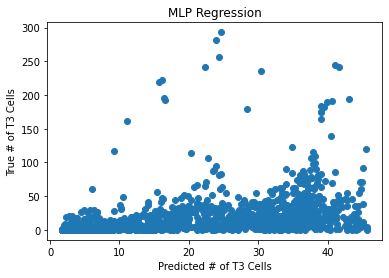

In [30]:
plt.scatter(y_pred_mlp, fold_3_counts[:,2])
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")
plt.title("MLP Regression")

plt.show()

### Table of Results for Regression Models

<!-- | Results | Ordinary Least Squares | Support Vector Regression | Multilayer Perceptron |
|---------|------------------------|---------------------------|-----------------------|
| RMSE | 
| Pearson r |
| Spearman r |
| $R^{2}$ | -->

In [31]:
model_results = [
    [mean_squared_error(fold_3_counts[:,2], y_pred_OLS, squared=False), pearsonr(fold_3_counts[:,2], y_pred_OLS)[0], spearmanr(fold_3_counts[:,2], y_pred_OLS)[0], r2_score(fold_3_counts[:,2], y_pred_OLS)],
    [mean_squared_error(fold_3_counts[:,2], y_pred_SVR, squared=False), pearsonr(fold_3_counts[:,2], y_pred_SVR)[0], spearmanr(fold_3_counts[:,2], y_pred_SVR)[0], r2_score(fold_3_counts[:,2], y_pred_SVR)],
    [mean_squared_error(fold_3_counts[:,2], y_pred_mlp, squared=False), pearsonr(fold_3_counts[:,2], y_pred_mlp)[0], spearmanr(fold_3_counts[:,2], y_pred_mlp)[0], r2_score(fold_3_counts[:,2], y_pred_mlp)],
]

df_model_results = pd.DataFrame(data=model_results, columns=["RMSE", "Pearson r", "Spearman r", "R2"], index=["OLS", "SVR", "MLP"])

print(df_model_results.to_string())

          RMSE  Pearson r  Spearman r        R2
OLS  29.524530   0.446131    0.629304  0.001621
SVR  30.032352   0.380384    0.628643 -0.033018
MLP  27.457969   0.388409    0.636189  0.136493


## Task 3: Using Convolutional Networks

We redefine our data and folds here so that there is no need to run the earlier parts of the notebooks before running this task.

In [1]:
import numpy as np
import pandas as pd

import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# redefince data here so no need to run rest of notebook to start from this point

X: np.ndarray = np.load("images.npy") # reads images
Y: pd.core.frame.DataFrame = pd.read_csv("counts.csv") # reads cell counts
F: np.ndarray = np.loadtxt("split.txt") # reads fold information

fold_1: np.ndarray = np.array([x for i, x in enumerate(X) if F[i] == 1])
fold_2: np.ndarray = np.array([x for i, x in enumerate(X) if F[i] == 2])
fold_3: np.ndarray = np.array([x for i, x in enumerate(X) if F[i] == 3])

Y_array: np.ndarray = Y.to_numpy()

fold_1_counts: np.ndarray = np.array([x for i, x in enumerate(Y_array) if F[i] == 1])
fold_2_counts: np.ndarray = np.array([x for i, x in enumerate(Y_array) if F[i] == 2])
fold_3_counts: np.ndarray = np.array([x for i, x in enumerate(Y_array) if F[i] == 3]) 

### a) Use a convolutional network to predict the T3 cell count directly from the images.

In [22]:
# normalize the data by dividing by 255
x_train: np.ndarray = fold_1/255.0 
x_val: np.ndarray = fold_2/255.0 

# get the cell counts for T3
y_train: np.ndarray = fold_1_counts[:,2]
y_val: np.ndarray = fold_2_counts[:,2]

model: keras.models.Sequential = Sequential() 

# 4 Convolutions
model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu', input_shape = x_train.shape[1:])) 
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last")) 

model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last")) 

model.add(Conv2D(32, kernel_size = (3, 3),  activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

model.add(Conv2D(32, kernel_size = (3, 3),  activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

# we have to flatten the image to get a vector 
model.add(Flatten()) 

# we have 3 hidden layers using the relu activation function
model.add(Dense(units = 64, activation = 'relu')) 
model.add(Dense(units = 64, activation = 'relu')) 
model.add(Dense(units = 32, activation = 'relu')) 

# only one output the T3 cell count
model.add(Dense(1, activation = 'linear'))

model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = model.fit(
   x_train, y_train, 
   batch_size = 128, 
   epochs = 30, 
   verbose = 1, 
   validation_data = (x_val, y_val)
)

Epoch 1/30
13/13 [==============================] - 59s 4s/step - loss: 1041.9236 - mean_absolute_error: 19.7530 - val_loss: 1151.0674 - val_mean_absolute_error: 16.3235
Epoch 2/30
13/13 [==============================] - 68s 5s/step - loss: 880.8595 - mean_absolute_error: 18.4842 - val_loss: 1099.3184 - val_mean_absolute_error: 17.6865
Epoch 3/30
13/13 [==============================] - 62s 5s/step - loss: 817.6284 - mean_absolute_error: 17.7324 - val_loss: 1026.8461 - val_mean_absolute_error: 18.1838
Epoch 4/30
13/13 [==============================] - 52s 4s/step - loss: 691.5613 - mean_absolute_error: 16.4454 - val_loss: 943.1623 - val_mean_absolute_error: 17.6539
Epoch 5/30
13/13 [==============================] - 53s 4s/step - loss: 682.2286 - mean_absolute_error: 15.6433 - val_loss: 1006.1977 - val_mean_absolute_error: 13.7969
Epoch 6/30
13/13 [==============================] - 52s 4s/step - loss: 665.7217 - mean_absolute_error: 15.3908 - val_loss: 912.3422 - val_mean_absolute_er

We show the convergence plot over all epochs.

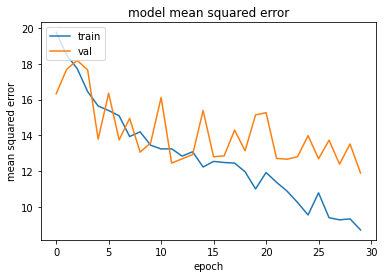

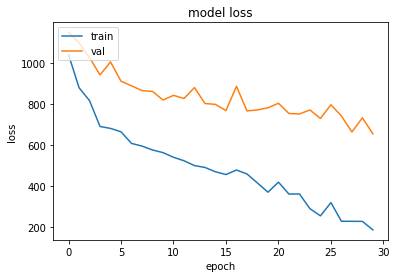

In [23]:
import matplotlib.pyplot as plt

# summarize history for error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean aboslute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

After tuning the hyperparameters using the validation set we now show and plot the results using the test set (fold 3).

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr

x_test: np.ndarray = fold_3/255.0

# get predictions for the third fold
y_pred: np.ndarray = model.predict(x_test).flatten()
y_test: np.ndarray = fold_3_counts[:,2]

print("\nOn test set (fold 3):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pearson r score: {pearsonr(y_test, y_pred)[0]}")
print(f"Spearman r score: {spearmanr(y_test, y_pred)[0]}")
print(f"R2 score: {r2_score(y_test, y_pred)}")


On test set (fold 3):

RMSE: 20.793474111602176
Pearson r score: 0.7150189230501918
Spearman r score: 0.7870176774990968
R2 score: 0.5047969189384311


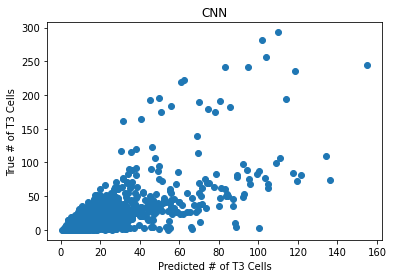

In [25]:
plt.scatter(y_pred, y_test)
plt.title("CNN")
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")

plt.show()

### b) Use 3 fold cross validation with the given folds.

There are 3 different choices of 2 folds:
1. Train: 1 & 2, Val: 3
2. Train: 1 & 3, Val: 2
3. Train: 2 & 3, Val: 1

In [3]:
def createModel(training_data: tuple, validation_data: tuple) -> keras.callbacks.History:
    model: keras.models.Sequential = Sequential() 

    x_train: np.ndarray = training_data[0]/255.0
    x_val: np.ndarray = validation_data[0]/255.0

    y_train: np.ndarray = training_data[1]
    y_val: np.ndarray = validation_data[1]

    # 4 Convolutions
    model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu', input_shape = x_train.shape[1:])) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last")) 

    model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last")) 

    model.add(Conv2D(32, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

    model.add(Conv2D(32, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

    # model.add(Dropout(0.25)) 

    # we have to flatten the image to get a vector 
    model.add(Flatten()) 

    # we have 3 hidden layers using the relu activation function
    model.add(Dense(units = 64, activation = 'relu')) 
    model.add(Dense(units = 64, activation = 'relu')) 
    model.add(Dense(units = 32, activation = 'relu')) 

    # only one output the T3 cell count
    model.add(Dense(1, activation = 'linear'))

    model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

    # reduced the number of epochs as we have to run this three times (and need to conserve time and memory)
    history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

    return model, history

1. Using fold 3 as validation fold:

In [46]:
print("Cross Validation 1:")
model_1, history_1 = createModel((np.concatenate((fold_1, fold_2), axis=0), np.concatenate((fold_1_counts[:,2], fold_2_counts[:,2]), axis=0)), (fold_3, fold_3_counts[:,2]))

Cross Validation 1:
Epoch 1/10
27/27 [==============================] - 129s 5s/step - loss: 1122.4722 - mean_absolute_error: 18.5073 - val_loss: 909.4351 - val_mean_absolute_error: 19.0603
Epoch 2/10
27/27 [==============================] - 104s 4s/step - loss: 937.7496 - mean_absolute_error: 17.7183 - val_loss: 817.7932 - val_mean_absolute_error: 18.6658
Epoch 3/10
27/27 [==============================] - 93s 3s/step - loss: 816.3330 - mean_absolute_error: 15.3698 - val_loss: 756.8048 - val_mean_absolute_error: 15.9702
Epoch 4/10
27/27 [==============================] - 112s 4s/step - loss: 745.7072 - mean_absolute_error: 14.4583 - val_loss: 692.6662 - val_mean_absolute_error: 14.0417
Epoch 5/10
27/27 [==============================] - 120s 4s/step - loss: 703.8267 - mean_absolute_error: 13.6379 - val_loss: 657.5696 - val_mean_absolute_error: 14.8602
Epoch 6/10
27/27 [==============================] - 127s 5s/step - loss: 665.8286 - mean_absolute_error: 13.3248 - val_loss: 893.6569 -


On test set (fold 3):

RMSE: 22.156319499211644
Pearson r score: 0.672897015137461
Spearman r score: 0.7555890415997342
R2 score: 0.4377564727624571


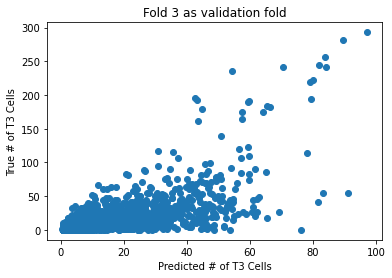

In [47]:
# get predictions for the val fold
x_test_1: np.ndarray = fold_3/255.0

y_pred_1: np.ndarray = model_1.predict(x_test_1).flatten()
y_val_1: np.ndarray = fold_3_counts[:,2]

print("\nOn test set (fold 3):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(y_val_1, y_pred_1, squared=False)}")
print(f"Pearson r score: {pearsonr(y_val_1, y_pred_1)[0]}")
print(f"Spearman r score: {spearmanr(y_val_1, y_pred_1)[0]}")
print(f"R2 score: {r2_score(y_val_1, y_pred_1)}")

plt.scatter(y_pred_1, y_val_1)
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")
plt.title("Fold 3 as validation fold")

plt.show()

2. Using fold 2 as validation fold:

In [4]:
print("Cross Validation 2:")
model_2, history_2 = createModel((np.concatenate((fold_1, fold_3), axis=0), np.concatenate((fold_1_counts[:,2], fold_3_counts[:,2]), axis=0)), (fold_2, fold_2_counts[:,2]))

Cross Validation 2:
Epoch 1/10
26/26 [==============================] - 150s 5s/step - loss: 904.3591 - mean_absolute_error: 17.6125 - val_loss: 953.0338 - val_mean_absolute_error: 17.3643
Epoch 2/10
26/26 [==============================] - 95s 4s/step - loss: 683.8909 - mean_absolute_error: 15.1021 - val_loss: 902.5291 - val_mean_absolute_error: 13.2471
Epoch 3/10
26/26 [==============================] - 86s 3s/step - loss: 609.7850 - mean_absolute_error: 13.8464 - val_loss: 792.7228 - val_mean_absolute_error: 12.1243
Epoch 4/10
26/26 [==============================] - 96s 4s/step - loss: 543.0898 - mean_absolute_error: 12.8385 - val_loss: 656.9385 - val_mean_absolute_error: 11.2530
Epoch 5/10
26/26 [==============================] - 87s 3s/step - loss: 496.0838 - mean_absolute_error: 12.1774 - val_loss: 601.2804 - val_mean_absolute_error: 12.1685
Epoch 6/10
26/26 [==============================] - 102s 4s/step - loss: 448.5249 - mean_absolute_error: 11.6056 - val_loss: 829.4297 - val


On test set (fold 2):

RMSE: 23.654896367572444
Pearson r score: 0.8294069613758146
Spearman r score: 0.8156507330401854
R2 score: 0.48449844436164125


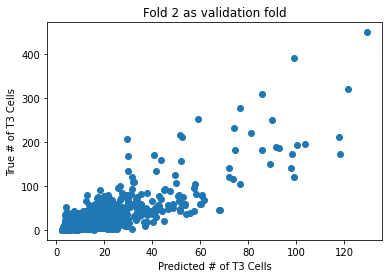

In [5]:
# get predictions for the val fold
x_test_2: np.ndarray = fold_2/255.0

y_pred_2: np.ndarray = model_2.predict(x_test_2).flatten()
y_val_2: np.ndarray = fold_2_counts[:,2]

print("\nOn test set (fold 2):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(y_val_2, y_pred_2, squared=False)}")
print(f"Pearson r score: {pearsonr(y_val_2, y_pred_2)[0]}")
print(f"Spearman r score: {spearmanr(y_val_2, y_pred_2)[0]}")
print(f"R2 score: {r2_score(y_val_2, y_pred_2)}")

plt.scatter(y_pred_2, y_val_2)
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")
plt.title("Fold 2 as validation fold")

plt.show()

3. Using fold 1 as validation fold

In [6]:
print("Cross Validation 3:")
model_3, history_3 = createModel((np.concatenate((fold_2, fold_3), axis=0), np.concatenate((fold_2_counts[:,2], fold_3_counts[:,2]), axis=0)), (fold_1, fold_1_counts[:,2]))

Cross Validation 3:
Epoch 1/10
27/27 [==============================] - 150s 5s/step - loss: 1069.1688 - mean_absolute_error: 17.5233 - val_loss: 869.6937 - val_mean_absolute_error: 16.7038
Epoch 2/10
27/27 [==============================] - 94s 4s/step - loss: 908.0168 - mean_absolute_error: 16.3104 - val_loss: 624.8652 - val_mean_absolute_error: 13.7553
Epoch 3/10
27/27 [==============================] - 90s 3s/step - loss: 790.5289 - mean_absolute_error: 14.5987 - val_loss: 648.8997 - val_mean_absolute_error: 13.2443
Epoch 4/10
27/27 [==============================] - 92s 3s/step - loss: 795.5159 - mean_absolute_error: 14.5953 - val_loss: 582.4576 - val_mean_absolute_error: 16.4666
Epoch 5/10
27/27 [==============================] - 109s 4s/step - loss: 677.0730 - mean_absolute_error: 13.2306 - val_loss: 551.1861 - val_mean_absolute_error: 11.8963
Epoch 6/10
27/27 [==============================] - 103s 4s/step - loss: 654.8112 - mean_absolute_error: 12.8987 - val_loss: 506.9823 - v


On test set (fold 1):

RMSE: 20.10771018807413
Pearson r score: 0.7200588719797405
Spearman r score: 0.8106827986943698
R2 score: 0.51077944884831


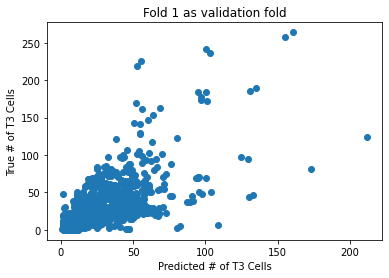

In [7]:
# get predictions for the val fold
x_test_3: np.ndarray = fold_1/255.0

y_pred_3: np.ndarray = model_3.predict(x_test_3).flatten()
y_val_3: np.ndarray = fold_1_counts[:,2]

print("\nOn test set (fold 1):\n")
# Squared=False gives the RMSE instead of MSE
print(f"RMSE: {mean_squared_error(y_val_3, y_pred_3, squared=False)}")
print(f"Pearson r score: {pearsonr(y_val_3, y_pred_3)[0]}")
print(f"Spearman r score: {spearmanr(y_val_3, y_pred_3)[0]}")
print(f"R2 score: {r2_score(y_val_3, y_pred_3)}")

plt.scatter(y_pred_3, y_val_3)
plt.xlabel("Predicted # of T3 Cells")
plt.ylabel("True # of T3 Cells")
plt.title("Fold 1 as validation fold")

plt.show()

### c) Use CNN and 3-fold CV to get counts for all 6 cell types

In [2]:
def createModel_6(training_data: tuple, validation_data: tuple) -> keras.callbacks.History:
    model: keras.models.Sequential = Sequential() 

    x_train: np.ndarray = training_data[0]/255.0
    x_val: np.ndarray = validation_data[0]/255.0

    y_train: np.ndarray = training_data[1]
    y_val: np.ndarray = validation_data[1]

    # 4 Convolutions
    model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu', input_shape = x_train.shape[1:])) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last")) 

    model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last")) 

    model.add(Conv2D(16, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

    model.add(Conv2D(32, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

    model.add(Conv2D(32, kernel_size = (3, 3),  activation = 'relu')) 
    model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

    # we have to flatten the image to get a vector 
    model.add(Flatten()) 

    # we have 3 hidden layers using the relu activation function
    model.add(Dense(units = 64, activation = 'relu')) 
    model.add(Dense(units = 64, activation = 'relu')) 
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu')) 

    # 6 nodes for the six types of cell counts
    model.add(Dense(6, activation = 'linear'))

    model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

    history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

    return model, history

1. Using fold 3 as validation fold

In [3]:
print("Cross Validation 1:")
model_1_6, history_1_6 = createModel_6((np.concatenate((fold_1, fold_2), axis=0), np.concatenate((fold_1_counts, fold_2_counts), axis=0)), (fold_3, fold_3_counts))

Cross Validation 1:
Epoch 1/10
27/27 [==============================] - 144s 5s/step - loss: 763.9524 - mean_absolute_error: 15.8810 - val_loss: 480.7076 - val_mean_absolute_error: 14.1647
Epoch 2/10
27/27 [==============================] - 129s 5s/step - loss: 425.5734 - mean_absolute_error: 11.4750 - val_loss: 352.7454 - val_mean_absolute_error: 10.2760
Epoch 3/10
27/27 [==============================] - 124s 5s/step - loss: 366.5169 - mean_absolute_error: 10.2487 - val_loss: 340.0231 - val_mean_absolute_error: 9.9009
Epoch 4/10
27/27 [==============================] - 111s 4s/step - loss: 357.7267 - mean_absolute_error: 9.9697 - val_loss: 360.2954 - val_mean_absolute_error: 10.9273
Epoch 5/10
27/27 [==============================] - 103s 4s/step - loss: 350.7225 - mean_absolute_error: 9.8758 - val_loss: 351.0027 - val_mean_absolute_error: 10.4563
Epoch 6/10
27/27 [==============================] - 92s 3s/step - loss: 344.6572 - mean_absolute_error: 9.7341 - val_loss: 356.3675 - val_


On test set (fold 3):

RMSE: 14.970980801012024
Pearson r score: 0.24718288718283402
Spearman r score: 0.30042170426008324
R2 score: -0.13128501574620696


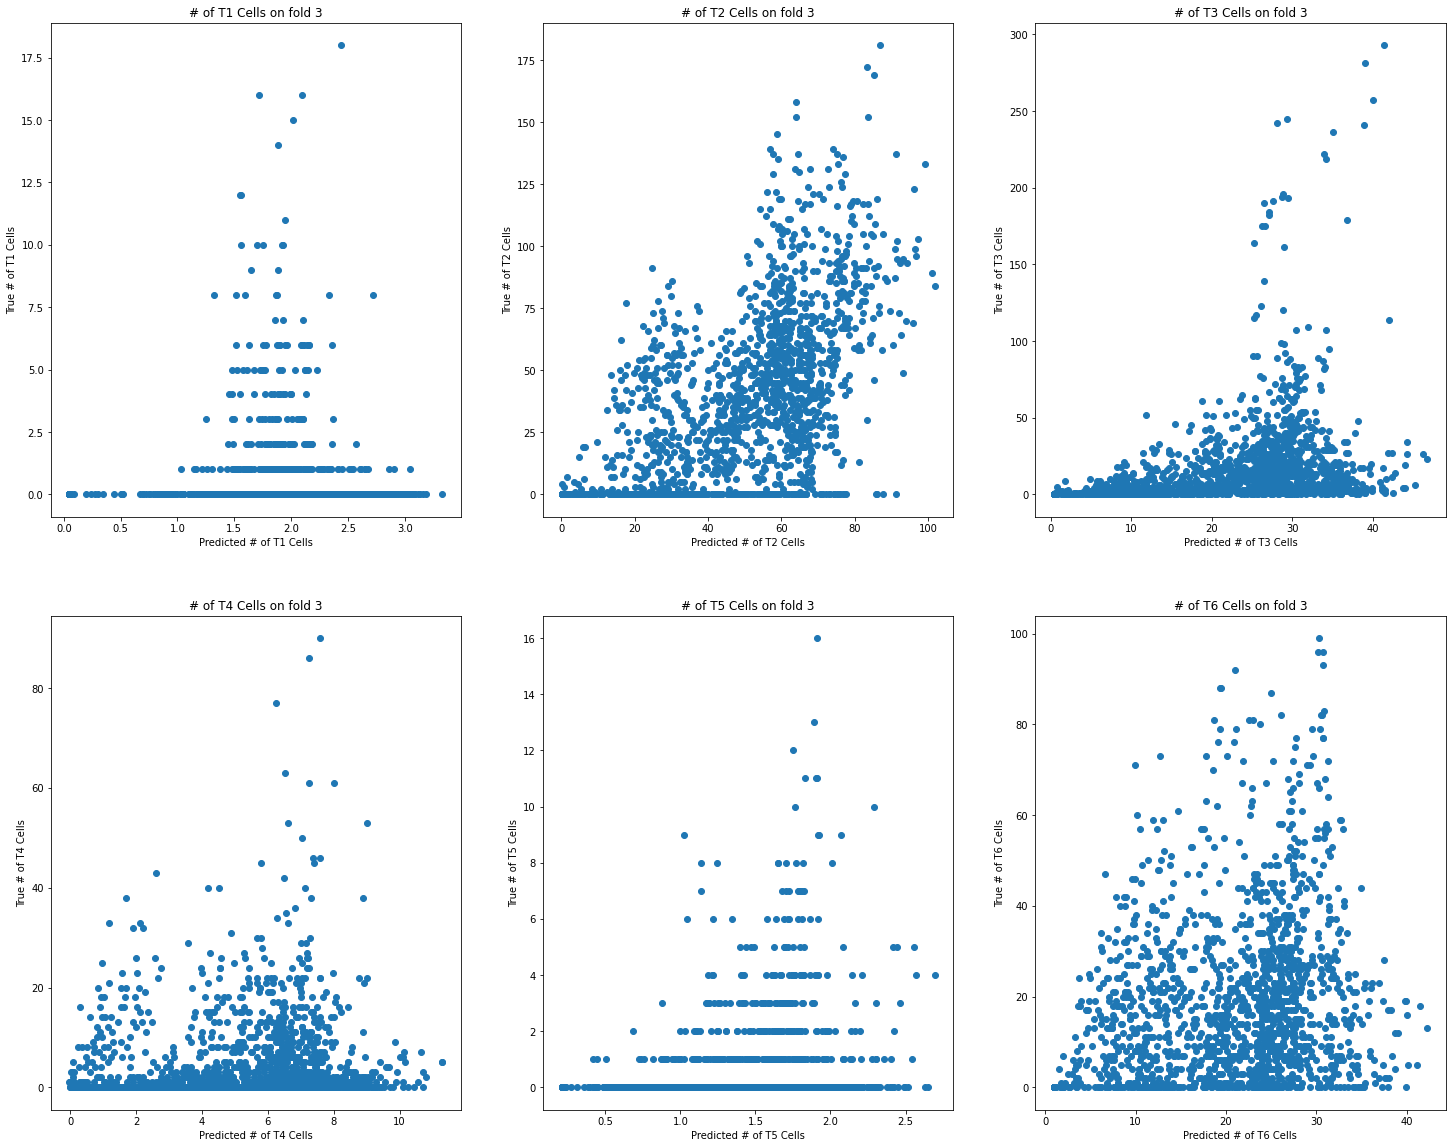

In [4]:
# get predictions for the val fold
x_test_1_6: np.ndarray = fold_3/255.0
y_pred_1_6: np.ndarray = model_1_6.predict(x_test_1_6)
y_val_1_6: np.ndarray = fold_3_counts

print("\nOn test set (fold 3):\n")

# Squared=False gives the RMSE instead of MSE
rmse_1_6 = mean_squared_error(y_val_1_6, y_pred_1_6, squared=False)
pearson_r_1_6 = np.mean(np.array([pearsonr(y_val_1_6[:,0], y_pred_1_6[:,0])[0], pearsonr(y_val_1_6[:,1], y_pred_1_6[:,1])[0], pearsonr(y_val_1_6[:,2], y_pred_1_6[:,2])[0], pearsonr(y_val_1_6[:,3], y_pred_1_6[:,3])[0], pearsonr(y_val_1_6[:,4], y_pred_1_6[:,4])[0], pearsonr(y_val_1_6[:,5], y_pred_1_6[:,5])[0]]))
spearman_r_1_6 = np.mean(np.array([spearmanr(y_val_1_6[:,0], y_pred_1_6[:,0])[0], spearmanr(y_val_1_6[:,1], y_pred_1_6[:,1])[0], spearmanr(y_val_1_6[:,2], y_pred_1_6[:,2])[0], spearmanr(y_val_1_6[:,3], y_pred_1_6[:,3])[0], spearmanr(y_val_1_6[:,4], y_pred_1_6[:,4])[0], spearmanr(y_val_1_6[:,5], y_pred_1_6[:,5])[0]]))
r2_1_6 = r2_score(y_val_1_6, y_pred_1_6)

print(f"RMSE: {rmse_1_6}")
print(f"Pearson r score: {pearson_r_1_6}")
print(f"Spearman r score: {spearman_r_1_6}")
print(f"R2 score: {r2_1_6}")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))

ax[0,0].scatter(y_pred_1_6[:,0], y_val_1_6[:,0])
ax[0,0].set_title("# of T1 Cells on fold 3")
ax[0,0].set_xlabel("Predicted # of T1 Cells")
ax[0,0].set_ylabel("True # of T1 Cells")

ax[0,1].scatter(y_pred_1_6[:,1], y_val_1_6[:,1])
ax[0,1].set_title("# of T2 Cells on fold 3")
ax[0,1].set_xlabel("Predicted # of T2 Cells")
ax[0,1].set_ylabel("True # of T2 Cells")

ax[0,2].scatter(y_pred_1_6[:,2], y_val_1_6[:,2])
ax[0,2].set_title("# of T3 Cells on fold 3")
ax[0,2].set_xlabel("Predicted # of T3 Cells")
ax[0,2].set_ylabel("True # of T3 Cells")

ax[1,0].scatter(y_pred_1_6[:,3], y_val_1_6[:,3])
ax[1,0].set_title("# of T4 Cells on fold 3")
ax[1,0].set_xlabel("Predicted # of T4 Cells")
ax[1,0].set_ylabel("True # of T4 Cells")

ax[1,1].scatter(y_pred_1_6[:,4], y_val_1_6[:,4])
ax[1,1].set_title("# of T5 Cells on fold 3")
ax[1,1].set_xlabel("Predicted # of T5 Cells")
ax[1,1].set_ylabel("True # of T5 Cells")

ax[1,2].scatter(y_pred_1_6[:,5], y_val_1_6[:,5])
ax[1,2].set_title("# of T6 Cells on fold 3")
ax[1,2].set_xlabel("Predicted # of T6 Cells")
ax[1,2].set_ylabel("True # of T6 Cells")

plt.show()

2. Using fold 2 as validation fold

In [5]:
print("Cross Validation 2:")
model_2_6, history_2_6 = createModel_6((np.concatenate((fold_1, fold_3), axis=0), np.concatenate((fold_1_counts, fold_3_counts), axis=0)), (fold_2, fold_2_counts))

Cross Validation 2:
Epoch 1/10
26/26 [==============================] - 120s 4s/step - loss: 715.7076 - mean_absolute_error: 14.7177 - val_loss: 507.5705 - val_mean_absolute_error: 11.3288
Epoch 2/10
26/26 [==============================] - 78s 3s/step - loss: 472.9082 - mean_absolute_error: 12.1100 - val_loss: 442.2641 - val_mean_absolute_error: 10.8784
Epoch 3/10
26/26 [==============================] - 82s 3s/step - loss: 449.9524 - mean_absolute_error: 11.5579 - val_loss: 422.5589 - val_mean_absolute_error: 10.7053
Epoch 4/10
26/26 [==============================] - 75s 3s/step - loss: 392.4951 - mean_absolute_error: 10.9348 - val_loss: 382.1040 - val_mean_absolute_error: 9.5660
Epoch 5/10
26/26 [==============================] - 80s 3s/step - loss: 355.8809 - mean_absolute_error: 10.1750 - val_loss: 361.9839 - val_mean_absolute_error: 9.3097
Epoch 6/10
26/26 [==============================] - 85s 3s/step - loss: 356.7530 - mean_absolute_error: 10.2200 - val_loss: 349.6557 - val_me


On test set (fold 2):

RMSE: 14.278215420856043
Pearson r score: 0.2766936556496549
Spearman r score: 0.31610227575588995
R2 score: -0.001786888670258428


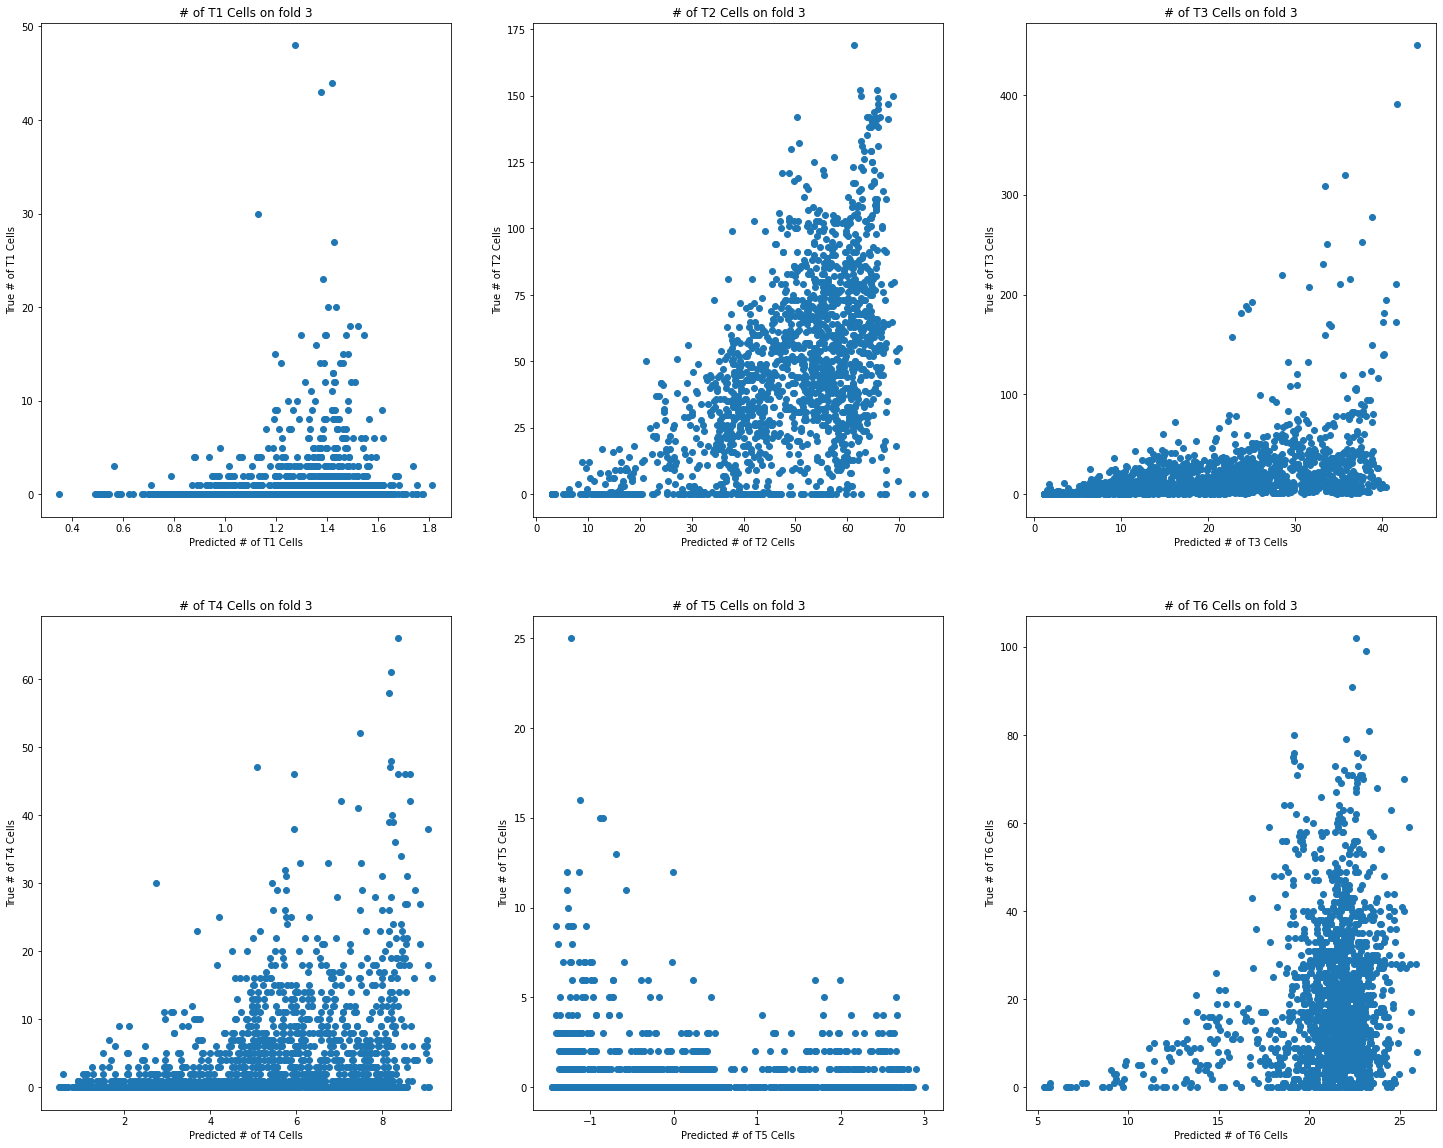

In [6]:
# get predictions for the val fold
x_test_2_6: np.ndarray = fold_2/255.0
y_pred_2_6: np.ndarray = model_2_6.predict(x_test_2_6)
y_val_2_6: np.ndarray = fold_2_counts

print("\nOn test set (fold 2):\n")

# Squared=False gives the RMSE instead of MSE
rmse_2_6 = mean_squared_error(y_val_2_6, y_pred_2_6, squared=False)
pearson_r_2_6 = np.mean(np.array([pearsonr(y_val_2_6[:,0], y_pred_2_6[:,0])[0], pearsonr(y_val_2_6[:,1], y_pred_2_6[:,1])[0], pearsonr(y_val_2_6[:,2], y_pred_2_6[:,2])[0], pearsonr(y_val_2_6[:,3], y_pred_2_6[:,3])[0], pearsonr(y_val_2_6[:,4], y_pred_2_6[:,4])[0], pearsonr(y_val_2_6[:,5], y_pred_2_6[:,5])[0]]))
spearman_r_2_6 = np.mean(np.array([spearmanr(y_val_2_6[:,0], y_pred_2_6[:,0])[0], spearmanr(y_val_2_6[:,1], y_pred_2_6[:,1])[0], spearmanr(y_val_2_6[:,2], y_pred_2_6[:,2])[0], spearmanr(y_val_2_6[:,3], y_pred_2_6[:,3])[0], spearmanr(y_val_2_6[:,4], y_pred_2_6[:,4])[0], spearmanr(y_val_2_6[:,5], y_pred_2_6[:,5])[0]]))
r2_2_6 = r2_score(y_val_2_6, y_pred_2_6)

print(f"RMSE: {rmse_2_6}")
print(f"Pearson r score: {pearson_r_2_6}")
print(f"Spearman r score: {spearman_r_2_6}")
print(f"R2 score: {r2_2_6}")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))

ax[0,0].scatter(y_pred_2_6[:,0], y_val_2_6[:,0])
ax[0,0].set_title("# of T1 Cells on fold 3")
ax[0,0].set_xlabel("Predicted # of T1 Cells")
ax[0,0].set_ylabel("True # of T1 Cells")

ax[0,1].scatter(y_pred_2_6[:,1], y_val_2_6[:,1])
ax[0,1].set_title("# of T2 Cells on fold 3")
ax[0,1].set_xlabel("Predicted # of T2 Cells")
ax[0,1].set_ylabel("True # of T2 Cells")

ax[0,2].scatter(y_pred_2_6[:,2], y_val_2_6[:,2])
ax[0,2].set_title("# of T3 Cells on fold 3")
ax[0,2].set_xlabel("Predicted # of T3 Cells")
ax[0,2].set_ylabel("True # of T3 Cells")

ax[1,0].scatter(y_pred_2_6[:,3], y_val_2_6[:,3])
ax[1,0].set_title("# of T4 Cells on fold 3")
ax[1,0].set_xlabel("Predicted # of T4 Cells")
ax[1,0].set_ylabel("True # of T4 Cells")

ax[1,1].scatter(y_pred_2_6[:,4], y_val_2_6[:,4])
ax[1,1].set_title("# of T5 Cells on fold 3")
ax[1,1].set_xlabel("Predicted # of T5 Cells")
ax[1,1].set_ylabel("True # of T5 Cells")

ax[1,2].scatter(y_pred_2_6[:,5], y_val_2_6[:,5])
ax[1,2].set_title("# of T6 Cells on fold 3")
ax[1,2].set_xlabel("Predicted # of T6 Cells")
ax[1,2].set_ylabel("True # of T6 Cells")

plt.show()

3. Using fold 1 as validation fold

In [7]:
print("Cross Validation 3:")
model_3_6, history_3_6 = createModel_6((np.concatenate((fold_2, fold_3), axis=0), np.concatenate((fold_2_counts, fold_3_counts), axis=0)), (fold_1, fold_1_counts))

Cross Validation 3:
Epoch 1/10
27/27 [==============================] - 116s 4s/step - loss: 585.9253 - mean_absolute_error: 12.9419 - val_loss: 446.9352 - val_mean_absolute_error: 12.6793
Epoch 2/10
27/27 [==============================] - 86s 3s/step - loss: 405.6596 - mean_absolute_error: 10.9694 - val_loss: 409.8313 - val_mean_absolute_error: 10.9143
Epoch 3/10
27/27 [==============================] - 87s 3s/step - loss: 369.8153 - mean_absolute_error: 10.2696 - val_loss: 383.0455 - val_mean_absolute_error: 10.3032
Epoch 4/10
27/27 [==============================] - 88s 3s/step - loss: 352.6571 - mean_absolute_error: 9.9648 - val_loss: 379.0376 - val_mean_absolute_error: 10.0918
Epoch 5/10
27/27 [==============================] - 75s 3s/step - loss: 347.5790 - mean_absolute_error: 9.7259 - val_loss: 368.2082 - val_mean_absolute_error: 10.0855
Epoch 6/10
27/27 [==============================] - 73s 3s/step - loss: 342.5690 - mean_absolute_error: 9.6990 - val_loss: 388.6551 - val_mea


On test set (fold 1):

RMSE: 14.57548435018712
Pearson r score: 0.2703919542567497
Spearman r score: 0.2764567090332029
R2 score: 0.06050242862534596


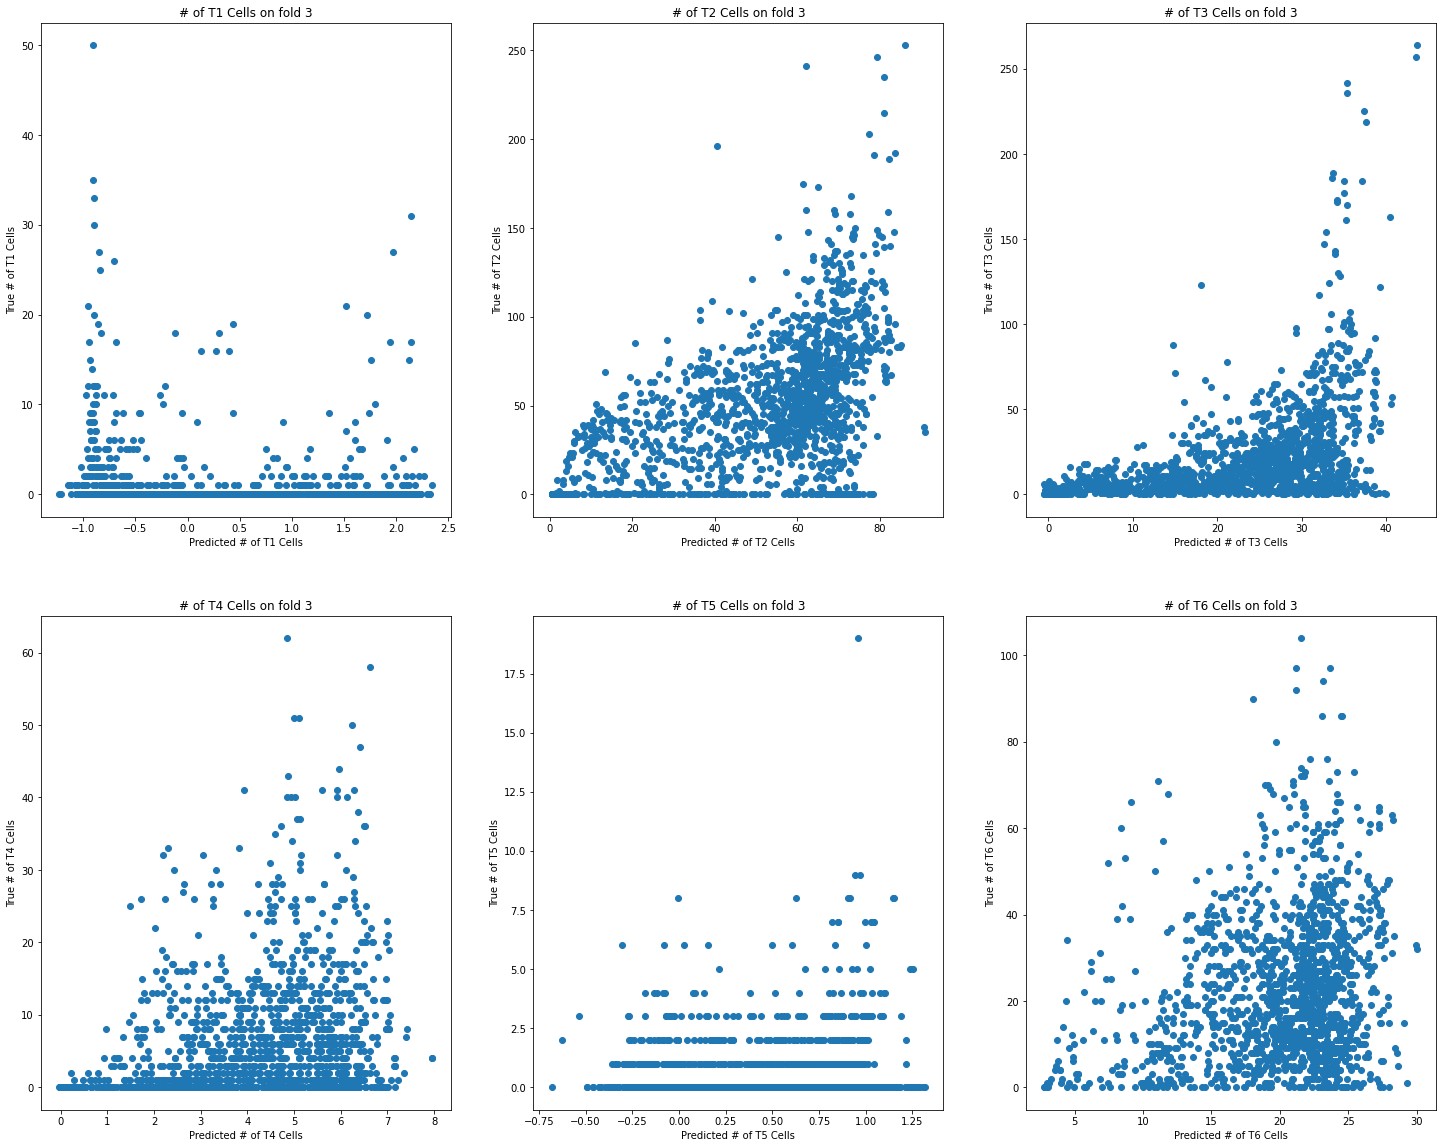

In [8]:
# get predictions for the val fold
x_test_3_6: np.ndarray = fold_1/255.0
y_pred_3_6: np.ndarray = model_3_6.predict(x_test_3_6)
y_val_3_6: np.ndarray = fold_1_counts

print("\nOn test set (fold 1):\n")

# Squared=False gives the RMSE instead of MSE
rmse_3_6 = mean_squared_error(y_val_3_6, y_pred_3_6, squared=False)
pearson_r_3_6 = np.mean(np.array([pearsonr(y_val_3_6[:,0], y_pred_3_6[:,0])[0], pearsonr(y_val_3_6[:,1], y_pred_3_6[:,1])[0], pearsonr(y_val_3_6[:,2], y_pred_3_6[:,2])[0], pearsonr(y_val_3_6[:,3], y_pred_3_6[:,3])[0], pearsonr(y_val_3_6[:,4], y_pred_3_6[:,4])[0], pearsonr(y_val_3_6[:,5], y_pred_3_6[:,5])[0]]))
spearman_r_3_6 = np.mean(np.array([spearmanr(y_val_3_6[:,0], y_pred_3_6[:,0])[0], spearmanr(y_val_3_6[:,1], y_pred_3_6[:,1])[0], spearmanr(y_val_3_6[:,2], y_pred_3_6[:,2])[0], spearmanr(y_val_3_6[:,3], y_pred_3_6[:,3])[0], spearmanr(y_val_3_6[:,4], y_pred_3_6[:,4])[0], spearmanr(y_val_3_6[:,5], y_pred_3_6[:,5])[0]]))
r2_3_6 = r2_score(y_val_3_6, y_pred_3_6)

print(f"RMSE: {rmse_3_6}")
print(f"Pearson r score: {pearson_r_3_6}")
print(f"Spearman r score: {spearman_r_3_6}")
print(f"R2 score: {r2_3_6}")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))

ax[0,0].scatter(y_pred_3_6[:,0], y_val_3_6[:,0])
ax[0,0].set_title("# of T1 Cells on fold 3")
ax[0,0].set_xlabel("Predicted # of T1 Cells")
ax[0,0].set_ylabel("True # of T1 Cells")

ax[0,1].scatter(y_pred_3_6[:,1], y_val_3_6[:,1])
ax[0,1].set_title("# of T2 Cells on fold 3")
ax[0,1].set_xlabel("Predicted # of T2 Cells")
ax[0,1].set_ylabel("True # of T2 Cells")

ax[0,2].scatter(y_pred_3_6[:,2], y_val_3_6[:,2])
ax[0,2].set_title("# of T3 Cells on fold 3")
ax[0,2].set_xlabel("Predicted # of T3 Cells")
ax[0,2].set_ylabel("True # of T3 Cells")

ax[1,0].scatter(y_pred_3_6[:,3], y_val_3_6[:,3])
ax[1,0].set_title("# of T4 Cells on fold 3")
ax[1,0].set_xlabel("Predicted # of T4 Cells")
ax[1,0].set_ylabel("True # of T4 Cells")

ax[1,1].scatter(y_pred_3_6[:,4], y_val_3_6[:,4])
ax[1,1].set_title("# of T5 Cells on fold 3")
ax[1,1].set_xlabel("Predicted # of T5 Cells")
ax[1,1].set_ylabel("True # of T5 Cells")

ax[1,2].scatter(y_pred_3_6[:,5], y_val_3_6[:,5])
ax[1,2].set_title("# of T6 Cells on fold 3")
ax[1,2].set_xlabel("Predicted # of T6 Cells")
ax[1,2].set_ylabel("True # of T6 Cells")

plt.show()

We now average our performance metrics over all 3 folds.

In [9]:
print("Average Performance:")

print(f"Average RMSE: {np.mean(np.array([rmse_1_6, rmse_2_6, rmse_3_6]))}")
print(f"Average Pearson r score: {np.mean(np.array([pearson_r_1_6, pearson_r_2_6, pearson_r_3_6]))}")
print(f"Average Spearman r score: {np.mean(np.array([spearman_r_1_6, spearman_r_2_6, spearman_r_3_6]))}")
print(f"Average R2 score: {np.mean(np.array([r2_1_6, r2_2_6, r2_3_6]))}")

Average Performance:
Average RMSE: 14.60822685735173
Average Pearson r score: 0.26475616569641286
Average Spearman r score: 0.29766022968305866
Average R2 score: -0.02418982526370647


## Conclusion

In summary we can see that our prediction of T2 cells is most likely the best and in particular prediction of T1, T4, T5 and T6 cells are pretty awful. However, our RMSE score is not too bad. This can probably be improved by increasing the number of convolutions and number of fully connected layers / increasing their size. However, increasing the number of epochs is unlikely to improve the performance as the models do seem to converge. Dropping links between layers in the fully connected layers was also tried but had no performance increase in fact it led to a performance decrease across nearly all metrics.

Here is a table of our 4 models' performance on T3 cells (We can clearly see that the CNN performs the best, although none of our models perform well):

|        | RMSE | Pearson r | Spearman r | $R^{2}$ |
|--------|------|-----------|------------|---------|
| OLS | 29.525 | 0.446 | 0.629 | 0.002 |
| SVR | 30.032 | 0.390 | 0.629 | -0.033 |
| MLP | 27.458 | 0.388 | 0.636 | 0.136 |
| CNN | 20.793 | 0.715 | 0.787 | 0.505 |

Here is our final model's performance on all cell types:

|        | RMSE | Pearson r | Spearman r | $R^{2}$ |
|--------|------|-----------|------------|---------|
| CNN | 14.608 | 0.265 | 0.298 | -0.024 |
